In [1]:
# import ggplot2 and dplyr
library(ggplot2)
library(umap)
library(gridExtra)
suppressPackageStartupMessages(library(DESeq2))
library(ggrepel)  # For better label placement
library(org.Hs.eg.db)
library(clusterProfiler)
library(tidyr)

Warning message:
"package 'ggplot2' was built under R version 4.3.1"
Warning message:
"package 'DESeq2' was built under R version 4.3.1"
Warning message:
"package 'S4Vectors' was built under R version 4.3.1"
Warning message:
"package 'IRanges' was built under R version 4.3.1"
Warning message:
"package 'GenomicRanges' was built under R version 4.3.1"
Warning message:
"package 'GenomeInfoDb' was built under R version 4.3.1"
Warning message:
"package 'MatrixGenerics' was built under R version 4.3.1"
Warning message:
"package 'matrixStats' was built under R version 4.3.3"
Warning message:
"package 'ggrepel' was built under R version 4.3.3"
Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.3.1"




Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  a

## Clustering

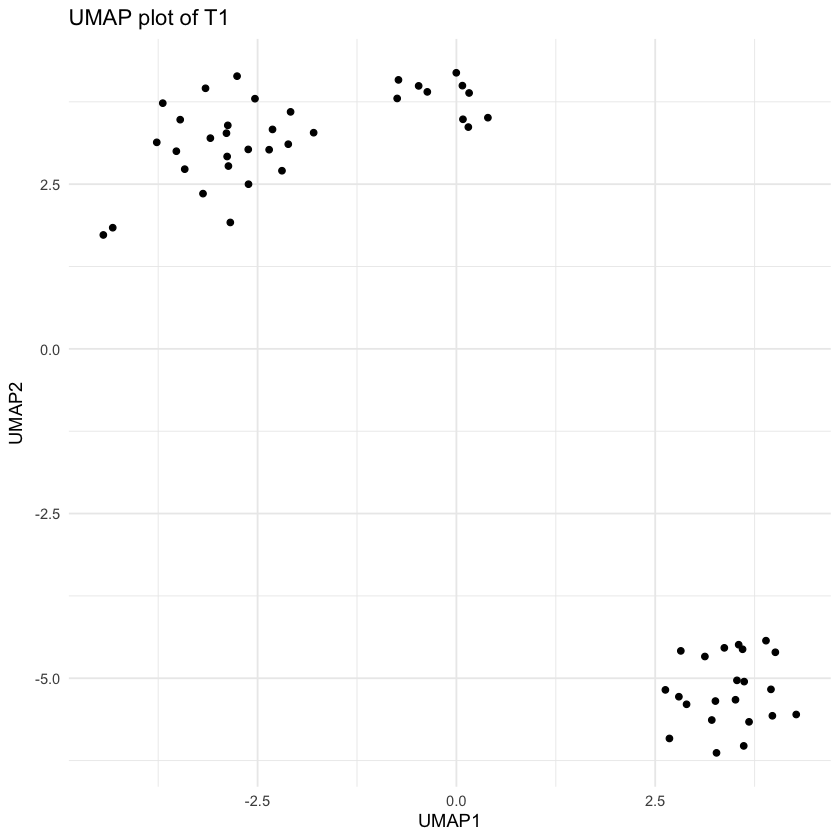

In [11]:
df_T1 <- read.csv("temp_data/T1.csv")

row.names(df_T1) <- df_T1$gene_ID
df_T1 <- df_T1[,-1]

df_T1.T <- t(df_T1)
df_T1.T <- df_T1.T[order(apply(df_T1.T, 1, var), decreasing = TRUE)[1:2000],]
df_T1.T <- df_T1.T[complete.cases(df_T1.T),]

constant_columns = which(apply(df_T1.T, 2, var) == 0)
df_T1.T <- df_T1.T[, -constant_columns]

#PCA and 50 PCA
pca_T1 <- prcomp(df_T1.T, scale = TRUE)
pca_T1_50 <- prcomp(df_T1.T, scale = TRUE)

dfT1.T <- as.data.frame(pca_T1$x)
dfT1.T_50 <- as.data.frame(pca_T1_50$x[,1:50])

#UMAP from 50 PCA
umap_T1 <- umap(dfT1.T_50, n_neighbors = 5, min_dist = 0.1, n_threads = 4)
dfT1.T_50$UMAP1 <- umap_T1$layout[,1]
dfT1.T_50$UMAP2 <- umap_T1$layout[,2]

ggplot(dfT1.T_50, aes(x = UMAP1, y = UMAP2)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T1")


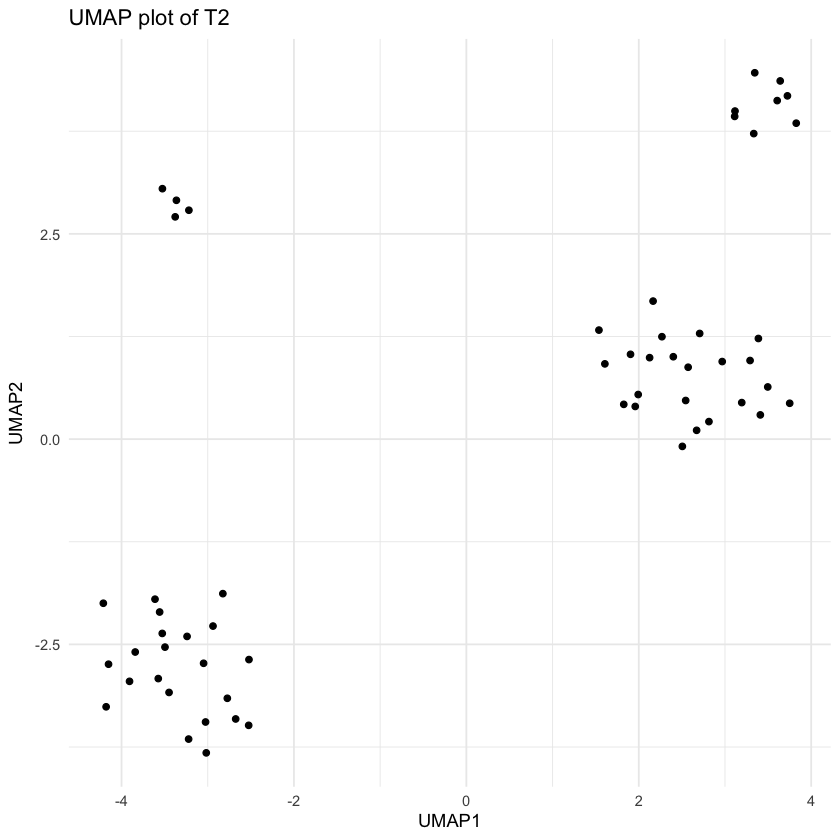

In [12]:
df_T2 <- read.csv("temp_data/T2.csv")

row.names(df_T2) <- df_T2$gene_ID
df_T2 <- df_T2[,-1]

df_T2.T <- t(df_T2)
df_T2.T <- df_T2.T[order(apply(df_T2.T, 1, var), decreasing = TRUE)[1:2000],]
df_T2.T <- df_T2.T[complete.cases(df_T2.T),]

constant_columns = which(apply(df_T2.T, 2, var) == 0)
df_T2.T <- df_T2.T[, -constant_columns]

#PCA and 50 PCA
pca_T2 <- prcomp(df_T2.T, scale = TRUE)
pca_T2_50 <- prcomp(df_T2.T, scale = TRUE)

dfT2.T <- as.data.frame(pca_T2$x)
dfT2.T_50 <- as.data.frame(pca_T2_50$x[,1:50])

#UMAP from 50 PCA
umap_T2 <- umap(dfT2.T_50, n_neighbors = 5, min_dist = 0.1, n_threads = 4)
dfT2.T_50$UMAP1 <- umap_T2$layout[,1]
dfT2.T_50$UMAP2 <- umap_T2$layout[,2]

ggplot(dfT2.T_50, aes(x = UMAP1, y = UMAP2)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T2")


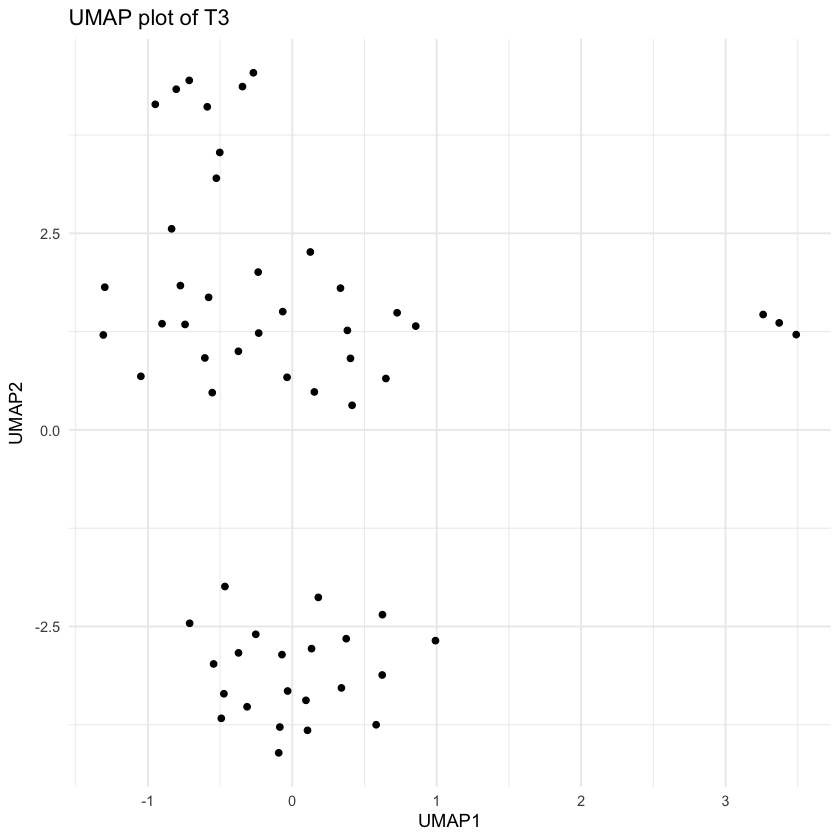

In [13]:
df_T3 <- read.csv("temp_data/T3.csv")

row.names(df_T3) <- df_T3$gene_ID
df_T3 <- df_T3[,-1]

df_T3.T <- t(df_T3)
df_T3.T <- df_T3.T[order(apply(df_T3.T, 1, var), decreasing = TRUE)[1:2000],]
df_T3.T <- df_T3.T[complete.cases(df_T3.T),]

constant_columns = which(apply(df_T3.T, 2, var) == 0)
df_T3.T <- df_T3.T[, -constant_columns]

#PCA and 50 PCA
pca_T3 <- prcomp(df_T3.T, scale = TRUE)
pca_T3_50 <- prcomp(df_T3.T, scale = TRUE)

dfT3.T <- as.data.frame(pca_T3$x)
dfT3.T_50 <- as.data.frame(pca_T3_50$x[,1:50])

#UMAP from 50 PCA
umap_T3 <- umap(dfT3.T_50, n_neighbors = 5, min_dist = 0.1, n_threads = 4)
dfT3.T_50$UMAP1 <- umap_T3$layout[,1]
dfT3.T_50$UMAP2 <- umap_T3$layout[,2]

ggplot(dfT3.T_50, aes(x = UMAP1, y = UMAP2)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T3")


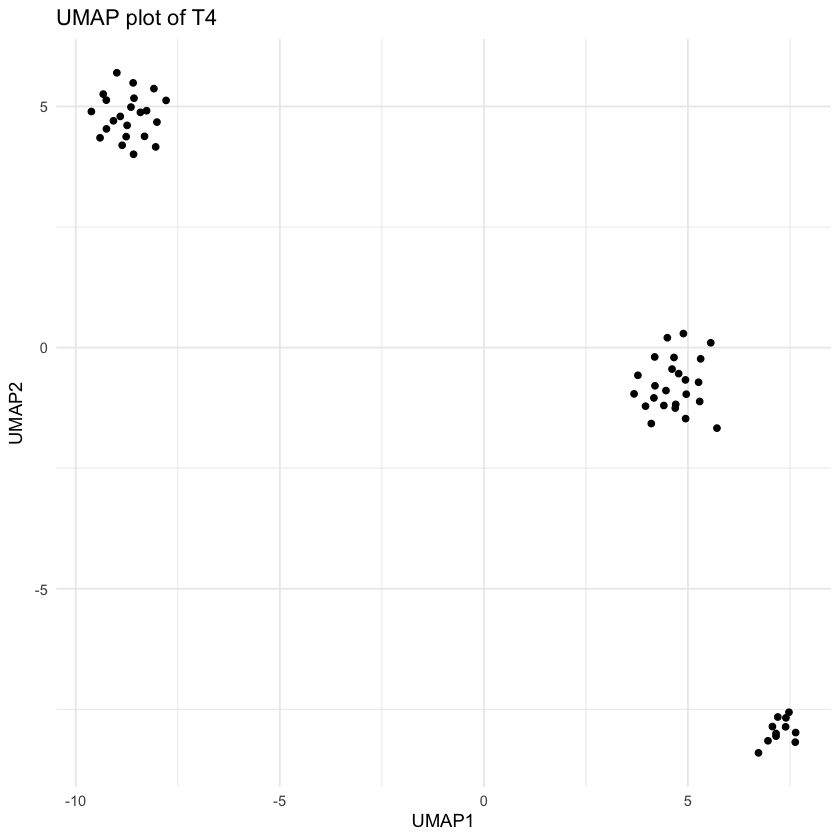

In [14]:
df_T4 <- read.csv("temp_data/T4.csv")

row.names(df_T4) <- df_T4$gene_ID
df_T4 <- df_T4[,-1]

df_T4.T <- t(df_T4)
df_T4.T <- df_T4.T[order(apply(df_T4.T, 1, var), decreasing = TRUE)[1:2000],]
df_T4.T <- df_T4.T[complete.cases(df_T4.T),]

constant_columns = which(apply(df_T4.T, 2, var) == 0)
df_T4.T <- df_T4.T[, -constant_columns]

#PCA and 50 PCA
pca_T4 <- prcomp(df_T4.T, scale = TRUE)
pca_T4_50 <- prcomp(df_T4.T, scale = TRUE)

dfT4.T <- as.data.frame(pca_T4$x)
dfT4.T_50 <- as.data.frame(pca_T4_50$x[,1:50])

#UMAP from 50 PCA
umap_T4 <- umap(dfT4.T_50, n_neighbors = 5, min_dist = 0.1, n_threads = 4)
dfT4.T_50$UMAP1 <- umap_T4$layout[,1]
dfT4.T_50$UMAP2 <- umap_T4$layout[,2]

ggplot(dfT4.T_50, aes(x = UMAP1, y = UMAP2)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T4")


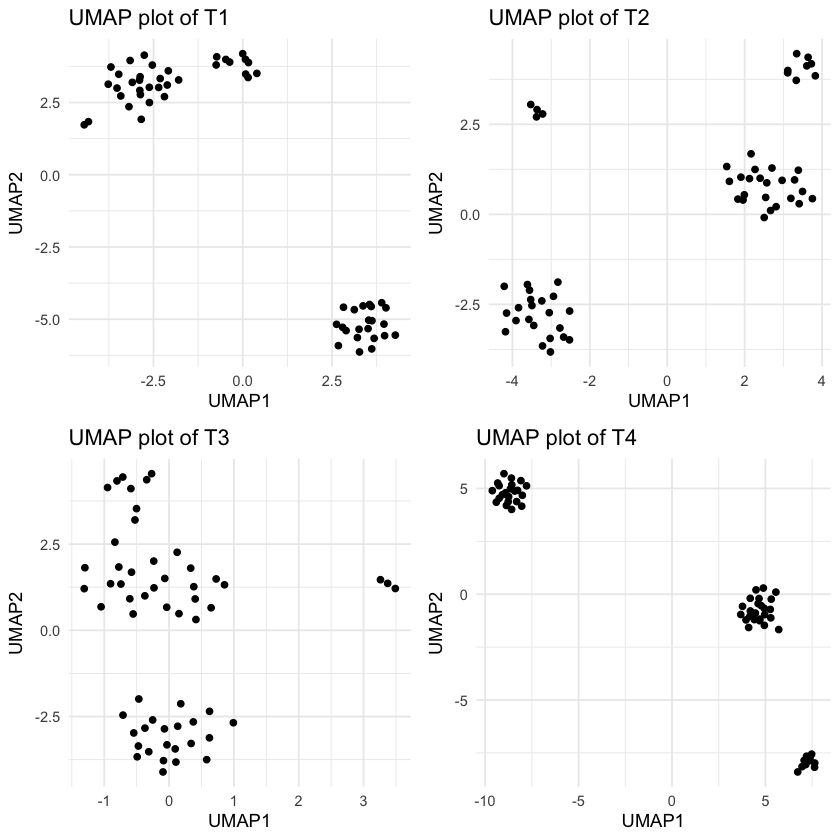

In [15]:
p1 <- ggplot(dfT1.T_50, aes(x = UMAP1, y = UMAP2)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T1")

p2 <- ggplot(dfT2.T_50, aes(x = UMAP1, y = UMAP2)) +
    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T2")

p3 <- ggplot(dfT3.T_50, aes(x = UMAP1, y = UMAP2)) +
    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T3")

p4 <- ggplot(dfT4.T_50, aes(x = UMAP1, y = UMAP2)) +
    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T4")

grid.arrange(p1, p2, p3, p4, ncol = 2)

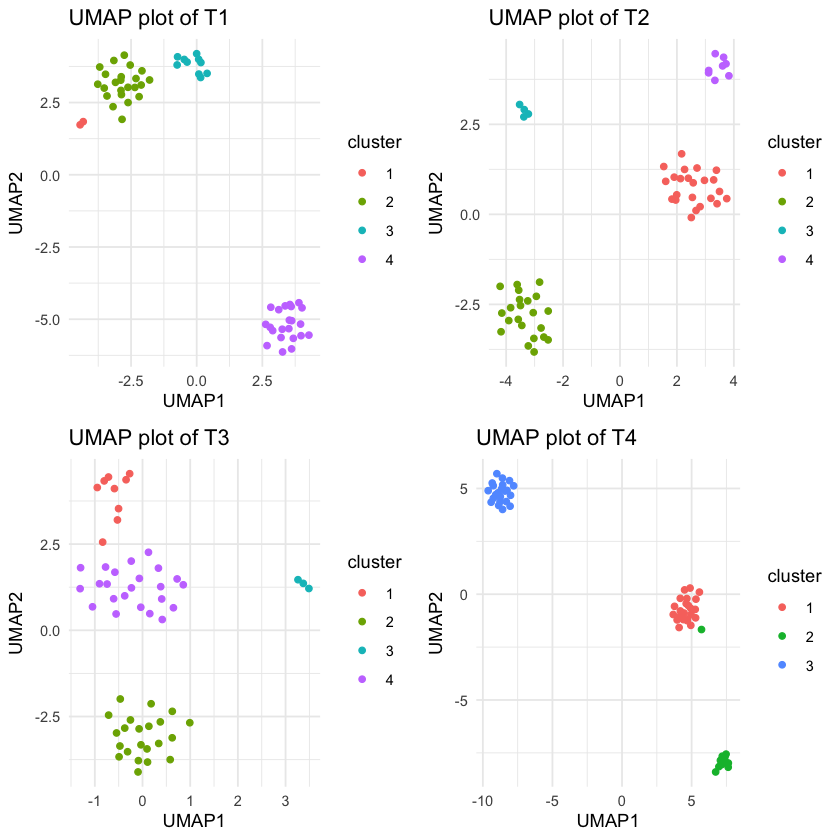

In [52]:
kmeans_T1 <- kmeans(dfT1.T_50, centers = 4)
dfT1.T_50$cluster <- as.factor(kmeans_T1$cluster)

kmeans_T2 <- kmeans(dfT2.T_50, centers = 4)
dfT2.T_50$cluster <- as.factor(kmeans_T2$cluster)

kmeans_T3 <- kmeans(dfT3.T_50, centers = 4)
dfT3.T_50$cluster <- as.factor(kmeans_T3$cluster)

kmeans_T4 <- kmeans(dfT4.T_50, centers = 3)
dfT4.T_50$cluster <- as.factor(kmeans_T4$cluster)

p1 <- ggplot(dfT1.T_50, aes(x = UMAP1, y = UMAP2, color = cluster)) +
  geom_point() +
  theme_minimal() +
  ggtitle("UMAP plot of T1")

p2 <- ggplot(dfT2.T_50, aes(x = UMAP1, y = UMAP2, color = cluster)) +
    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T2")

p3 <- ggplot(dfT3.T_50, aes(x = UMAP1, y = UMAP2, color = cluster)) +

    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T3")

p4 <- ggplot(dfT4.T_50, aes(x = UMAP1, y = UMAP2, color = cluster)) +
    geom_point() +
    theme_minimal() +
    ggtitle("UMAP plot of T4")

grid.arrange(p1, p2, p3, p4, ncol = 2)


## Gene Ontology of the clusters

In [53]:
#save the data
write.csv(dfT1.T_50, "temp_data/dfT1.T_50.csv")
write.csv(dfT2.T_50, "temp_data/dfT2.T_50.csv")
write.csv(dfT3.T_50, "temp_data/dfT3.T_50.csv")
write.csv(dfT4.T_50, "temp_data/dfT4.T_50.csv")

In [54]:
df_raw <- read.csv("temp_data/RAW_DATA.csv")
row.names(df_raw) <- df_raw$gene_ID
df_raw <- df_raw[,-1]
#Filter the columns which have T1 and T2
df_raw_T1 <- df_raw[,grep("T1", colnames(df_raw))]
df_raw_T2 <- df_raw[,grep("T2", colnames(df_raw))]
df_raw_T3 <- df_raw[,grep("T3", colnames(df_raw))]
df_raw_T4 <- df_raw[,grep("T4", colnames(df_raw))]

In [55]:
head(dfT4.T_50)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,UMAP1,UMAP2,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
X1052_T4,-76.44480,-7.493357,-8.4359163,17.389936,-116.262796,-16.486036,15.86441,-23.964820,42.692432,-52.658165,...,0.7593688,0.8034341,-4.149310,-0.286646,-5.761494,0.6843700,3.3158315,-8.573839,5.1708402,3
X1014_T4,35.79581,108.748628,-9.4970308,-18.489480,1.991622,26.267168,74.17956,4.956794,-48.642486,-53.033711,...,3.6682393,-9.8148328,10.971021,-7.181883,-5.489171,-4.0539717,2.7313120,7.400382,-7.6759922,2
X1119_T4,34.49381,105.198992,-11.0937214,-20.779826,-6.584995,-11.787858,28.17013,-15.174336,13.805416,-11.655397,...,7.0165270,-8.1618368,27.727879,7.355212,11.846983,7.6600174,-15.9462418,7.069950,-7.8563209,2
X1065_T4,35.23242,108.046079,-11.5271175,-17.591062,-23.756375,2.351739,31.71145,-14.758254,19.494807,82.682687,...,5.1575780,-2.9558512,6.711182,-3.850134,6.269137,-0.9528458,7.7460112,7.201673,-7.6586490,2
X1100_T4,55.88572,-32.734269,-0.3771096,71.015698,-14.187773,66.004042,50.80620,37.992457,-24.919747,5.211771,...,-3.3811986,-2.6099863,2.064843,-8.198708,2.608261,3.4541868,10.5148165,4.772419,-0.5393407,1
X1001_T4,-75.47986,-8.224402,-5.1551807,1.211787,-38.109981,-15.619457,17.49604,-40.004290,1.200494,35.648149,...,-0.4804365,2.0761680,2.228835,7.457336,5.122045,6.8268224,0.7095618,-9.248266,4.5346633,3


In [56]:
head(df_raw_T4)

,X1068_T4,X1119_T4,X1133_T4,X1149_T4,X1112_T4,X1029_T4,X1065_T4,X1097_T4,X1131_T4,X1080_T4,...,X1025_T4,X1092_T4,X1058_T4,X1067_T4,X1052_T4,X1113_T4,X1015_T4,X1140_T4,X1090_T4,X1106_T4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,0,0,8,0,6,2,1,5,0,8,...,0,0,0,18,0,0,0,34,3,39
ENSG00000000457,25,13,33,88,0,17,0,4,14,20,...,64,0,40,11,0,6,0,19,20,12
ENSG00000000460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,2,0,1,7,2
ENSG00000000938,308,56,244,430,225,47,26,124,156,143,...,112,227,292,230,9,139,510,177,340,150


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3403 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



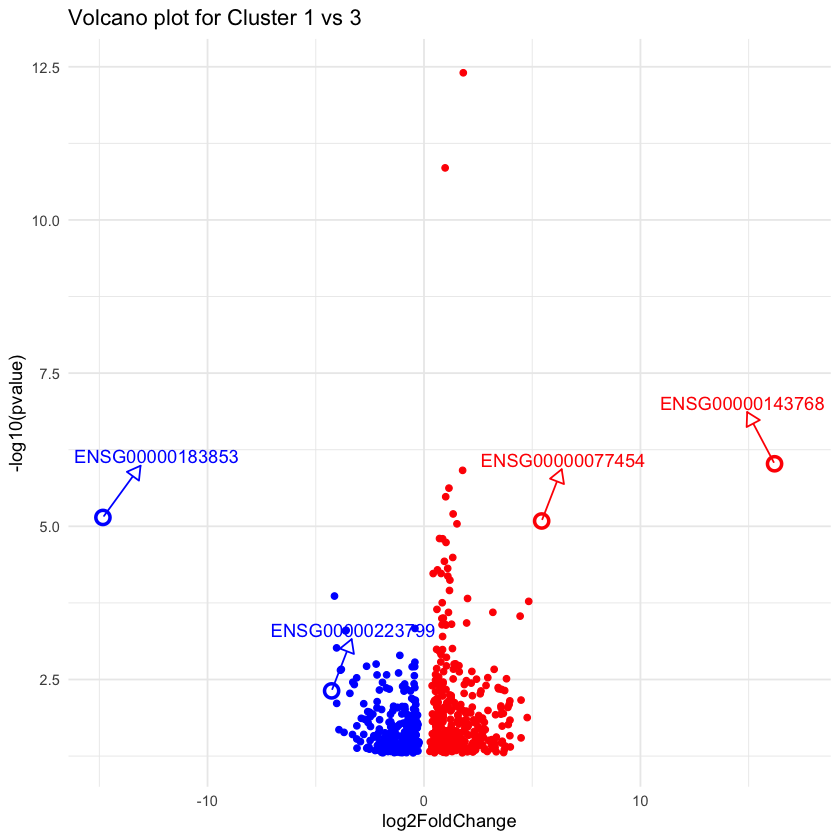

In [76]:
#Arrange the columns in the same order as rownames of dfT4.T_50
df_raw_T4 <- df_raw_T4[,rownames(dfT4.T_50)]

groups <- factor(dfT4.T_50$cluster) 
min_read <- 1
df_raw_T4 <- df_raw_T4[apply(df_raw_T4,1,function(x){max(x)}) > min_read,]
sampleInfo <- data.frame(groups,row.names=colnames(df_raw_T4))

dds <- DESeqDataSetFromMatrix(countData = df_raw_T4, colData = sampleInfo, design = ~ groups)
dds$groups <- relevel(dds$groups, ref="1")
dds <- DESeq(dds)
res1 <- results(dds,independentFiltering=F)
res1 <- res1[which(res1$pvalue < 0.05),]

#plot the volcano plot

top_up <- res1[order(-res1$log2FoldChange), ][1:2, ]
top_down <- res1[order(res1$log2FoldChange), ][1:2, ]

# Add a color column to the res1ults based on p-value and log2FoldChange
res1$color <- ifelse(res1$pvalue < 0.05 & res1$log2FoldChange > 0, "red", 
                    ifelse(res1$pvalue < 0.05 & res1$log2FoldChange < 0, "blue", "black"))

# Identify the top 2 upregulated and downregulated genes
top_up <- res1[order(-res1$log2FoldChange), ][1:2, ]
top_down <- res1[order(res1$log2FoldChange), ][1:2, ]

# Add color column to top_up and top_down as well
top_up$color <- "red"
top_down$color <- "blue"

# Plot the volcano plot
ggplot(res1, aes(x = log2FoldChange, y = -log10(pvalue), color = color)) +
  geom_point() +
  theme_minimal() +
  ggtitle("Volcano plot for Cluster 1 vs 3") +
  scale_color_identity() +  # Use predefined colors from the "color" column
  geom_point(data = rbind(top_up, top_down), aes(color = color), shape = 21, size = 3, fill = "white", stroke = 1.5) +  # Highlight top points
  geom_text_repel(
    data = rbind(top_up, top_down), 
    aes(label = rownames(rbind(top_up, top_down))),
    arrow = arrow(length = unit(0.02, "npc"), type = "closed", ends = "first"),  # Adds an arrow
    nudge_x = 1,  # Nudges labels to avoid overlap
    nudge_y = 1,
    max.overlaps = Inf,
    segment.size = 0.5  # Controls the line thickness
  )

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3403 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



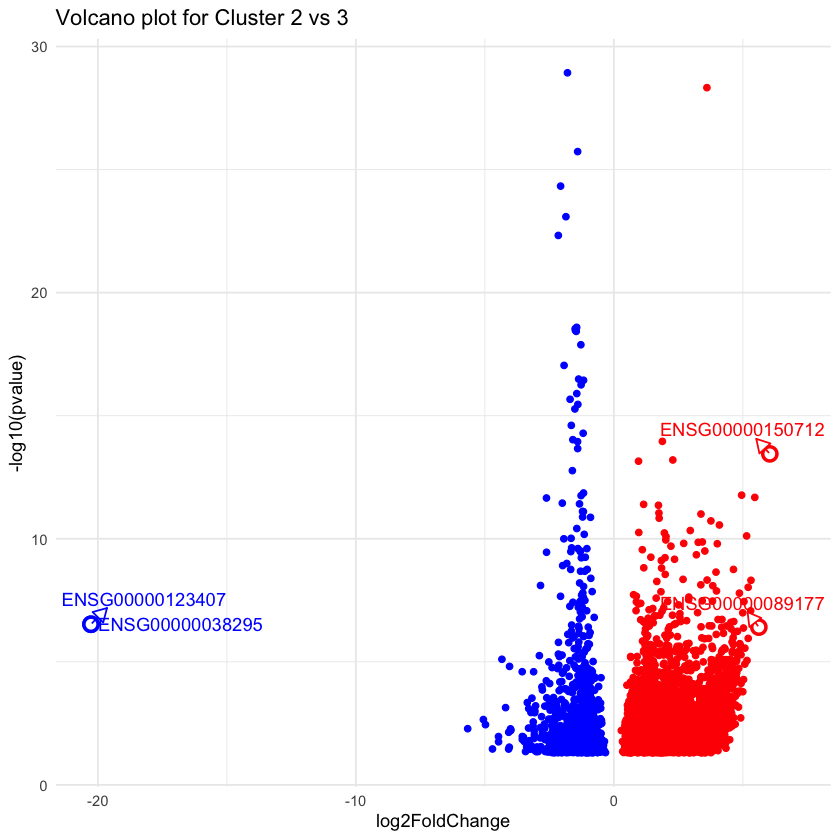

In [72]:
#Arrange the columns in the same order as rownames of dfT4.T_50
df_raw_T4 <- df_raw_T4[,rownames(dfT4.T_50)]

groups <- factor(dfT4.T_50$cluster) 
min_read <- 1
df_raw_T4 <- df_raw_T4[apply(df_raw_T4,1,function(x){max(x)}) > min_read,]
sampleInfo <- data.frame(groups,row.names=colnames(df_raw_T4))

dds <- DESeqDataSetFromMatrix(countData = df_raw_T4, colData = sampleInfo, design = ~ groups)
dds$groups <- relevel(dds$groups, ref="2")
dds <- DESeq(dds)
res2 <- results(dds,independentFiltering=F)
res2 <- res2[which(res2$pvalue < 0.05),]

#plot the volcano plot

top_up <- res2[order(-res2$log2FoldChange), ][1:2, ]
top_down <- res2[order(res2$log2FoldChange), ][1:2, ]

# Add a color column to the res2ults based on p-value and log2FoldChange
res2$color <- ifelse(res2$pvalue < 0.05 & res2$log2FoldChange > 0, "red", 
                    ifelse(res2$pvalue < 0.05 & res2$log2FoldChange < 0, "blue", "black"))

# Identify the top 2 upregulated and downregulated genes
top_up <- res2[order(-res2$log2FoldChange), ][1:2, ]
top_down <- res2[order(res2$log2FoldChange), ][1:2, ]

# Add color column to top_up and top_down as well
top_up$color <- "red"
top_down$color <- "blue"

# Plot the volcano plot
ggplot(res2, aes(x = log2FoldChange, y = -log10(pvalue), color = color)) +
  geom_point() +
  theme_minimal() +
  ggtitle("Volcano plot for Cluster 2 vs 3") +
  scale_color_identity() +  # Use predefined colors from the "color" column
  geom_point(data = rbind(top_up, top_down), aes(color = color), shape = 21, size = 3, fill = "white", stroke = 1.5) +  # Highlight top points
  geom_text_repel(
    data = rbind(top_up, top_down), 
    aes(label = rownames(rbind(top_up, top_down))),
    arrow = arrow(length = unit(0.02, "npc"), type = "closed", ends = "first"),  # Adds an arrow
    nudge_x = 1,  # Nudges labels to avoid overlap
    nudge_y = 1,
    max.overlaps = Inf,
    segment.size = 0.5  # Controls the line thickness
  )

In [78]:
#Get the significant gene which have logFC value > 1 and <-1 and pvalue < 0.05

significant_genes <- res1[which(res1$pvalue < 0.05 & (res1$log2FoldChange > 1 | res1$log2FoldChange < -1)),]

In [79]:
GO_results <- enrichGO(
    gene          = rownames(significant_genes),  # Replace with the appropriate gene IDs
    OrgDb         = org.Hs.eg.db, 
    keyType       = "ENSEMBL", 
    ont           = "BP",         # Ontology: Biological Process
    pvalueCutoff  = 1,            # Set cutoff to include all terms
    qvalueCutoff  = 1,            # Set cutoff to include all terms
    readable      = TRUE          # Convert gene IDs to gene names (optional)
)

In [80]:
GO_results_1v3 <- GO_results

In [81]:
#Get the significant gene which have logFC value > 1 and <-1 and pvalue < 0.05

significant_genes <- res2[which(res2$pvalue < 0.05 & (res2$log2FoldChange > 1 | res2$log2FoldChange < -1)),]

In [82]:
GO_results <- enrichGO(
    gene          = rownames(significant_genes),  # Replace with the appropriate gene IDs
    OrgDb         = org.Hs.eg.db, 
    keyType       = "ENSEMBL", 
    ont           = "BP",         # Ontology: Biological Process
    pvalueCutoff  = 1,            # Set cutoff to include all terms
    qvalueCutoff  = 1,            # Set cutoff to include all terms
    readable      = TRUE          # Convert gene IDs to gene names (optional)
)

In [83]:
GO_results_2v3 <- GO_results

In [84]:
df_GO_results_1v3 <- as.data.frame(GO_results_1v3)
df_GO_results_1v3$Result <- "Cluster 1 vs 3"

df_GO_results_2v3 <- as.data.frame(GO_results_2v3)
df_GO_results_2v3$Result <- "Cluster 2 vs 3"

In [87]:
df_GO_results_1v3 <- df_GO_results_1v3[1:5,]
df_GO_results_2v3 <- df_GO_results_2v3[1:5,]

In [88]:
df_GO_results <- rbind(df_GO_results_1v3, df_GO_results_2v3)

In [90]:
df_GO_results

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,Result
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
GO:0015669,GO:0015669,gas transport,4/240,22/20772,1.079396e-04,3.101106e-01,3.087073e-01,CA2/HBG2/HBM/HBD,4,Cluster 1 vs 3
GO:0015670,GO:0015670,carbon dioxide transport,3/240,14/20772,5.046208e-04,3.712446e-01,3.695647e-01,CA2/HBG2/HBD,3,Cluster 1 vs 3
GO:0090075,GO:0090075,relaxation of muscle,4/240,35/20772,6.868208e-04,3.712446e-01,3.695647e-01,P2RX4/PDE5A/SOD1/GSTM2,4,Cluster 1 vs 3
GO:0015671,GO:0015671,oxygen transport,3/240,16/20772,7.631904e-04,3.712446e-01,3.695647e-01,HBG2/HBM/HBD,3,Cluster 1 vs 3
GO:1901658,GO:1901658,glycosyl compound catabolic process,4/240,36/20772,7.657263e-04,3.712446e-01,3.695647e-01,ENPP4/CDADC1/PNP/NAGA,4,Cluster 1 vs 3
GO:0002181,GO:0002181,cytoplasmic translation,62/2240,180/20772,1.706439e-17,1.025058e-13,9.593780e-14,DHX29/EIF2B3/RPS5/RPLP0/RPL3/FMR1/RPS16/RPS19/RPL18A/EIF3A/RPL28/RPL19/RPS13/RPS12/NCBP2/EIF4G1/RPS15/RPL5/RPS10/RPL36/EIF3G/RPS15A/SYNCRIP/DHX9/RPLP1/RPS2/RPS11/RPL13A/RPS8/RPS27A/RPL37/RPL10/RPL7A/FAU/HNRNPU/RPL8/RPL9/SLBP/RPS14/NEMF/METTL3/RPL13/RPSA/RPS9/RPS21/RPS7/RPL4/RPL15/RPLP2/RPL14/RPS26/RPL37A/RPL12/RPS4X/RPL23A/RPL10A/MTOR/RACK1/RPS29/UBA52/RPL41/RPS18,62,Cluster 2 vs 3
GO:0042254,GO:0042254,ribosome biogenesis,82/2240,331/20772,3.067475e-13,9.213161e-10,8.622833e-10,LAS1L/TSR3/UTP18/NOP58/WDR3/DHX29/NLE1/RPS5/NOP14/DDX18/ESF1/RPLP0/SNU13/RPS16/RPS19/NOP53/FTSJ3/DROSHA/RPS15/NOL10/TENT4B/RPL5/EXOSC9/DDX27/SBDS/KRI1/GNL3L/EXOSC2/DKC1/RAN/WDR74/NAT10/LTV1/RNASEL/NOB1/URB1/RPS8/NVL/NHP2/RPL7L1/NOM1/RPL10/PDCD11/SRFBP1/RPP38/UTP14A/CUL4B/WDR43/UTP15/RPS14/NOL6/TSC1/BMS1/METTL17/RPSA/METTL15/RIOX2/RPS9/CHD7/RPS21/RPS7/POP7/TRMT112/SART1/RBIS/RRS1/GEMIN4/NOP10/NGRN/UTP11/RPL14/RRP7A/NOP9/NOL8/RPL23A/DDX3X/NSUN5P1/WDR46/PRKDC/BOP1/GTF2H5/DDX52,82,Cluster 2 vs 3
GO:0016072,GO:0016072,rRNA metabolic process,72/2240,279/20772,1.035428e-12,2.073273e-09,1.940429e-09,LAS1L/TSR3/UTP18/NOP58/WDR3/NOP14/DDX18/ESF1/SNU13/RPS16/RPS19/NOP53/FTSJ3/DROSHA/NCL/RPS15/NOL10/POLR1G/GTF3C3/TENT4B/RPL5/EXOSC9/DDX27/GTF3C4/SBDS/KRI1/EXOSC2/DKC1/WDR74/NAT10/RNASEL/NOB1/URB1/RPS8/NVL/NHP2/RPL7L1/PDCD11/SRFBP1/RPP38/UTP14A/DEDD2/WDR43/UTP15/RPS14/NOL6/BMS1/METTL15/CHD7/RPS21/RPS7/POP7/TRMT112/SART1/RRS1/GEMIN4/NOP10/UTP11/BRF1/RPL14/RRP7A/NOP9/NOL8/MTOR/NSUN5P1/ERCC6/WDR46/SLFN14/PRKDC/BOP1/GTF2H5/DDX52,72,Cluster 2 vs 3
GO:0006364,GO:0006364,rRNA processing,63/2240,237/20772,6.740157e-12,1.012203e-08,9.473468e-09,LAS1L/TSR3/UTP18/NOP58/WDR3/NOP14/DDX18/ESF1/SNU13/RPS16/RPS19/NOP53/FTSJ3/DROSHA/RPS15/NOL10/TENT4B/RPL5/EXOSC9/DDX27/SBDS/KRI1/EXOSC2/DKC1/WDR74/NAT10/RNASEL/NOB1/URB1/RPS8/NVL/NHP2/RPL7L1/PDCD11/SRFBP1/RPP38/UTP14A/WDR43/UTP15/RPS14/NOL6/BMS1/METTL15/CHD7/RPS21/RPS7/POP7/TRMT112/SART1/RRS1/GEMIN4/NOP10/UTP11/RPL14/RRP7A/NOP9/NOL8/NSUN5P1/WDR46/PRKDC/BOP1/GTF2H5/DDX52,63,Cluster 2 vs 3


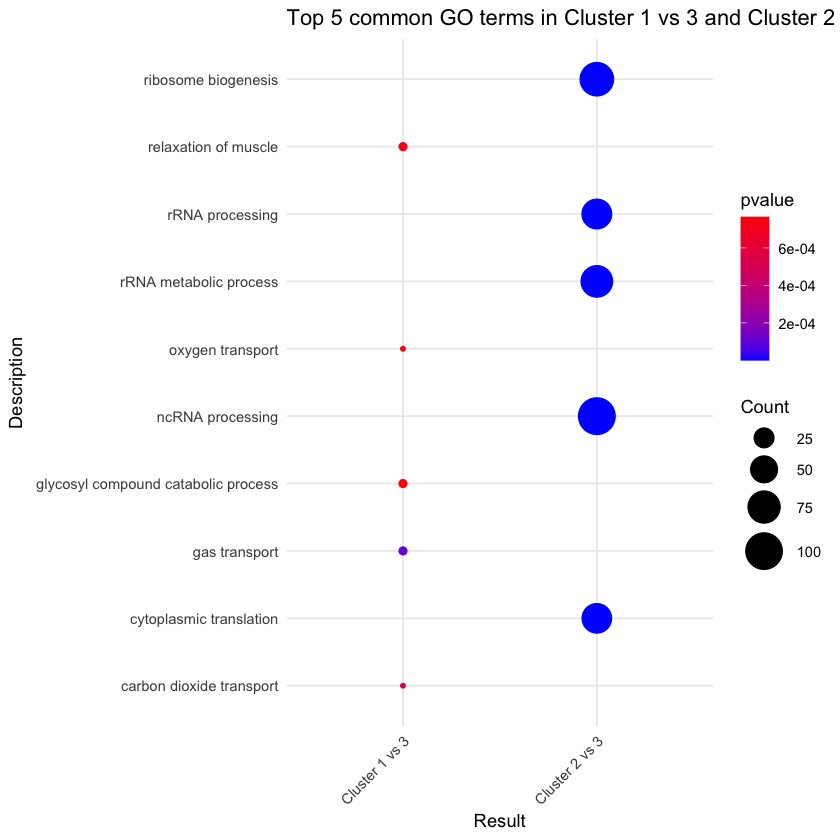

In [92]:
#plot the top 5 common GO terms in a bubble plot such that the size of the bubble is proportional to the gene count and color to the pvalue and y is the biological process and x is the results

ggplot(df_GO_results, aes(x = Result, y = Description, size = Count, color = pvalue)) +
  geom_point() +
  theme_minimal() +
  ggtitle("Top 5 common GO terms in Cluster 1 vs 3 and Cluster 2 vs 3") +
  scale_size_continuous(range = c(1, 10)) +
  scale_color_gradient(low = "blue", high = "red") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [95]:
significant_genes_cluster1v3 <- res1[which(res1$pvalue < 0.05 & (res1$log2FoldChange > 1 | res1$log2FoldChange < -1)),]
significant_genes_cluster2v3 <- res2[which(res2$pvalue < 0.05 & (res2$log2FoldChange > 1 | res2$log2FoldChange < -1)),]



In [96]:
GO_results_1v3 <- enrichGO(
    gene          = rownames(significant_genes_cluster1v3),  # Replace with the appropriate gene IDs
    OrgDb         = org.Hs.eg.db, 
    keyType       = "ENSEMBL", 
    ont           = "MF",         # Ontology: Biological Process
    pvalueCutoff  = 1,            # Set cutoff to include all terms
    qvalueCutoff  = 1,            # Set cutoff to include all terms
    readable      = TRUE          # Convert gene IDs to gene names (optional)
)

GO_results_2v3 <- enrichGO(
    gene          = rownames(significant_genes_cluster2v3),  # Replace with the appropriate gene IDs
    OrgDb         = org.Hs.eg.db, 
    keyType       = "ENSEMBL", 
    ont           = "MF",         # Ontology: Biological Process
    pvalueCutoff  = 1,            # Set cutoff to include all terms
    qvalueCutoff  = 1,            # Set cutoff to include all terms
    readable      = TRUE          # Convert gene IDs to gene names (optional)
)

In [97]:
df_GO_results_1v3 <- as.data.frame(GO_results_1v3)
df_GO_results_1v3$Result <- "Cluster 1 vs 3"

df_GO_results_2v3 <- as.data.frame(GO_results_2v3)
df_GO_results_2v3$Result <- "Cluster 2 vs 3"

In [98]:
df_GO_results_1v3 <- df_GO_results_1v3[1:5,]
df_GO_results_2v3 <- df_GO_results_2v3[1:5,]

In [99]:
df_GO_results <- rbind(df_GO_results_1v3, df_GO_results_2v3)

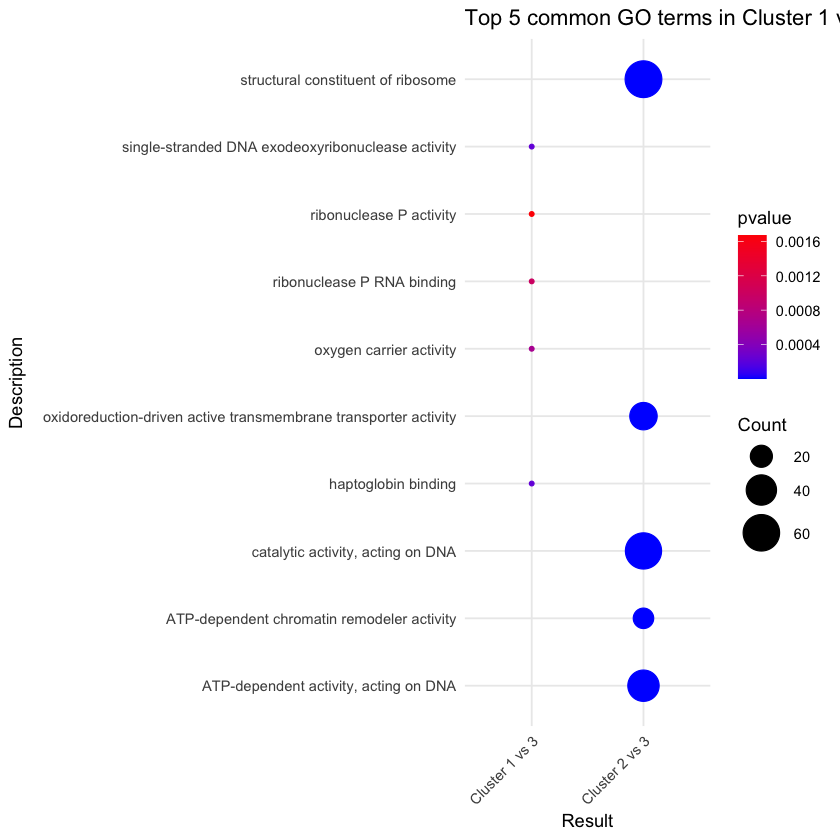

In [100]:
#plot the top 5 common GO terms in a bubble plot such that the size of the bubble is proportional to the gene count and color to the pvalue and y is the biological process and x is the results

ggplot(df_GO_results, aes(x = Result, y = Description, size = Count, color = pvalue)) +
  geom_point() +
  theme_minimal() +
  ggtitle("Top 5 common GO terms in Cluster 1 vs 3 and Cluster 2 vs 3") +
  scale_size_continuous(range = c(1, 10)) +
  scale_color_gradient(low = "blue", high = "red") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))